<a href="https://colab.research.google.com/github/townset/AAE-590-DSMM/blob/main/inclass_3_129.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


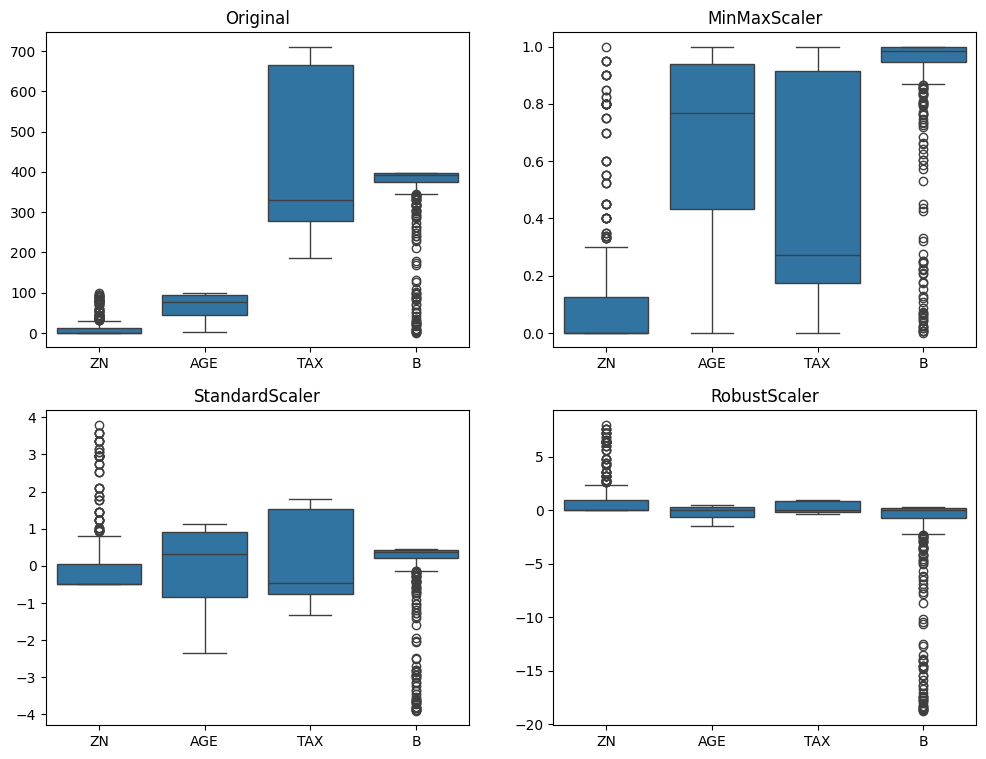

In [23]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
# Data wrangling
import pandas as pd
import numpy as np

# ... (rest of your imports)

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Convert the NumPy array 'data' to a Pandas DataFrame
# and assign column names for better usability
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data = pd.DataFrame(data, columns=column_names) # Convert data to DataFrame
data['target'] = target # Add the target column

# Missing values and data type

data.info() # Now you can call info() on the DataFrame
# Summary statistics

data.describe().transpose()
# ... (rest of your code)

# Missing values and data type

data.info()
# Summary statistics

data.describe().transpose()
# Get predictor and target variables
X = data.drop('target', axis = 1)
Y = data['target']

# X, Y shape
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)
# Instantiate MinMaxScaler, StandardScaler and RobustScaler

norm = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()
# MinMaxScaler
normalised_features = norm.fit_transform(X)
normalised_df = pd.DataFrame(normalised_features, index = X.index, columns = X.columns)

# StandardScaler
standardised_features = standard.fit_transform(X)
standardised_df = pd.DataFrame(standardised_features, index = X.index, columns = X.columns)

# RobustScaler
robust_features = robust.fit_transform(X)
robust_df = pd.DataFrame(robust_features, index = X.index, columns = X.columns)
# Create subplots
fig, ax = plt.subplots(2, 2, figsize = (12, 9))

# Original
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(data[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[0, 0])
ax[0, 0].set_title('Original')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('')

# MinMaxScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(normalised_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[0, 1])
ax[0, 1].set_title('MinMaxScaler')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

# StandardScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(standardised_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[1, 0])
ax[1, 0].set_title('StandardScaler')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')

# RobustScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(robust_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[1, 1])
ax[1, 1].set_title('RobustScaler')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')
# Instantiate models
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor(max_depth = 10, random_state = 42)

# Create a list which contains different scalers
scalers = [norm, standard, robust]
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)
knn_rmse = []

# Without feature scaling
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using KNN
for scaler in scalers:
    pipe = make_pipeline(scaler, knn)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results
knn_df = pd.DataFrame({'RMSE': knn_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
knn_df
svr_rmse = []

# Without feature scaling
svr.fit(X_train, Y_train)
pred = svr.predict(X_test)
svr_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using SVR
for scaler in scalers:
    pipe = make_pipeline(scaler, svr)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    svr_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))


# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['target'] = boston.target
data.head()
# Missing values and data type

data.info()
# Summary statistics

data.describe().transpose()
# Get predictor and target variables
X = data.drop('target', axis = 1)
Y = data['target']

# X, Y shape
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)
# Instantiate MinMaxScaler, StandardScaler and RobustScaler

norm = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()
# MinMaxScaler
normalised_features = norm.fit_transform(X)
normalised_df = pd.DataFrame(normalised_features, index = X.index, columns = X.columns)

# StandardScaler
standardised_features = standard.fit_transform(X)
standardised_df = pd.DataFrame(standardised_features, index = X.index, columns = X.columns)

# RobustScaler
robust_features = robust.fit_transform(X)
robust_df = pd.DataFrame(robust_features, index = X.index, columns = X.columns)









# Create subplots
fig, ax = plt.subplots(2, 2, figsize = (12, 9))

# Original
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(data[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[0, 0])
ax[0, 0].set_title('Original')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('')

# MinMaxScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(normalised_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[0, 1])
ax[0, 1].set_title('MinMaxScaler')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

# StandardScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(standardised_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[1, 0])
ax[1, 0].set_title('StandardScaler')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')

# RobustScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(robust_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[1, 1])
ax[1, 1].set_title('RobustScaler')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')







# Instantiate models
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor(max_depth = 10, random_state = 42)

# Create a list which contains different scalers
scalers = [norm, standard, robust]
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)
knn_rmse = []

# Without feature scaling
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using KNN
for scaler in scalers:
    pipe = make_pipeline(scaler, knn)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results
knn_df = pd.DataFrame({'RMSE': knn_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
knn_df
svr_rmse = []

# Without feature scaling
svr.fit(X_train, Y_train)
pred = svr.predict(X_test)
svr_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using SVR
for scaler in scalers:
    pipe = make_pipeline(scaler, svr)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    svr_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results
svr_df = pd.DataFrame({'RMSE': svr_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
svr_df
tree_rmse = []

# Without feature scaling
tree.fit(X_train, Y_train)
pred = tree.predict(X_test)
tree_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using decision tree
for scaler in scalers:
    pipe = make_pipeline(scaler, tree)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    tree_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results
tree_df = pd.DataFrame({'RMSE': tree_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
tree_df

# Without feature scaling
tree.fit(X_train, Y_train)
pred = tree.predict(X_test)
tree_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using decision tree
for scaler in scalers:
    pipe = make_pipeline(scaler, tree)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    tree_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results
tree_df = pd.DataFrame({'RMSE': tree_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
tree_df
